# AULA 9 - ÁRVORES DE DECISÃO

---




Considere-se o seguinte dataset com empréstimos. A Classe define se o pedido de empréstimo vai ou não entrar em default (não pagar).

<img src="images/class_2.png" style="width:40%"/>

### A pergunta a que qualquer modelo de classificação deve responder é:

> Conhecendo vários exemplares com a respectiva classificação (train_data ,train_target) quais são as classes de exemplares ainda desconhecidos?

<img src="images/classification.png" style="width:60%"/>



## Métodos de classificação que vamos estudar:

[ESTA AULA]



[PROXIMAS AULAS]

- Árvores de Decisão;
- Linear Model for Classification
- Random Forrest;
- Naive Bays (Bayesian Methods)
- KNN
- Kernel Methods


---

# Decision Tree Classifiers
---

Uma árvore de decisão é uma estrutura hierárquica de nós e conexões com uma direção. Existem três tipos de nós numa
árvore de decisão: 
- Root *Node*; 
- Internal *Node*; 
- Leaf *Nodes*;

O algoritmo base de Decision Tree funciona da seguinte forma, tomando todos os registos de treino:

> 0) Comece com um so *Node* e todos os dados

> 1) Se o *Node* que temos contém uma só classe então o node é do tipo *Leaf*

> 2) Se o *Node* contém várias classes, então deve ser subdividido usando uma função que selecciona o atributo certo e a os valores certos de o fazer, para partir os seus registos em *sub-nodes*. Os *sub-nodes* resultantes passam a conter os registos que cumprem as regras dos novos *sub-nodes*. Esta função **attribute_selection_method()** é o ponto mais importante do algoritmo.

> 3) Se um *node* fica sem registos, toma a classe do seu pai

> 4) Se o *Node* contém várias classes e todos os registos têm a mesma classe, então a sua classe é a moda da classe dos registos;

Começemos por colocar todos os registos num só *node*:

<img src="images/class_2.png" style="width:40%"/>

Este Node toma o valor

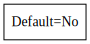

In [12]:
import graphviz

graph = graphviz.Digraph()
graph.node('A', 'Default=No', shape="rectangle")
graph

Isto acontece porque a moda da classe dos registos neste *node* é "No". Como existem múltiplas classes vamos dividir este node em 2, de acordo com um atributo. 

Para tal chamamos a função **attribute_selection_method()** que nos dá a feature e o valor da divisão (a ver mais à frente). **Imaginemos** que a primeira divisão é Home Owner:

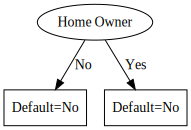

In [13]:
import graphviz

graph = graphviz.Digraph()
graph.node('A', 'Home Owner', shape="ellipse")
#graph.node('E', 'Default=No', shape="ellipse", style='filled')
graph.node('B1', 'Default=No', shape="rectangle")
graph.node('B2', 'Default=No', shape="rectangle")
graph.edge("A", "B1", " No")
graph.edge("A", "B2", " Yes")

graph

Se continuarmos com este processo obteríamos as etapa b), c) e d)

<img src="images/class_3.png" style="width:70%"/>



## Splits

**Para além da escolha da feature do próximo split, é necessário escolher a forma de fazer o split dentro de uma feature. Por exemplo, o marital status pode ser *splitted* de várias formas:**

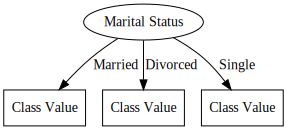

In [14]:
import graphviz

graph = graphviz.Digraph()
graph.node('A', 'Marital Status', shape="ellipse")
#graph.node('E', 'Default=No', shape="ellipse", style='filled')
graph.node('B1', 'Class Value', shape="rectangle")
graph.node('B2', 'Class Value', shape="rectangle")
graph.node('B3', 'Class Value', shape="rectangle")
graph.edge("A", "B1", " Married")
graph.edge("A", "B2", " Divorced")
graph.edge("A", "B3", " Single")
graph


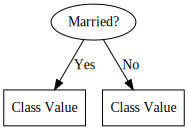

In [15]:
graph = graphviz.Digraph()
graph.node('A', 'Married?', shape="ellipse")
#graph.node('E', 'Default=No', shape="ellipse", style='filled')
graph.node('B1', 'Class Value', shape="rectangle")
graph.node('B2', 'Class Value', shape="rectangle")
graph.edge("A", "B1", " Yes")
graph.edge("A", "B2", " No")

graph

No caso de parâmetros contínuos o problema mantêm-se:

### Métodos de divisão de Nodes com features contínuas

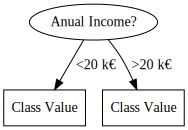

In [16]:
graph = graphviz.Digraph()
graph.node('A', 'Anual Income?', shape="ellipse")
#graph.node('E', 'Default=No', shape="ellipse", style='filled')
graph.node('B1', 'Class Value', shape="rectangle")
graph.node('B2', 'Class Value', shape="rectangle")
graph.edge("A", "B1", " <20 k€")
graph.edge("A", "B2", " >20 k€")

graph


## Criação uma árvore de Decisão
---

<img src="images/class_2.png" style="width:40%"/>


#### Perguntas que se colocam:

>- Mas como devemos **escolher as features** a dividir em cada caso
>- E como devemos **escolher a forma de divisão das features** em cada caso (ver proximo slide)
>- E **os valores de "threshold" da divisão** (ver por exemplo a divisão em d))

#### Resposta:

Saber qual a árvore que melhor descreve os nossos dados é um problema complexo, da família de problemas NP-Complete, onde se têm que testar todas as combinações. É uma abordagem demasiado difícil para ser resolvido na totalidade - **há demasiadas combinações para testar**. 

Os métodos existentes são chamados de *greedy* (gananciosos), são métodos que tentam optimizar por *node* (feitos através da tomadas de decisão óptimas node a node - locais) a escolha da divisão seguinte **de forma a que esta seja a melhor possível**.

> Mas o que quer dizer melhor? 

> R: Essa resposta é dada pela função já apresentada de **attribute_selection_method**, que veremos de seguida.



**Resumindo, na decisão da divisão a executar em cada *node* a função attribute_selection_method deve dizer:**

- 1º - Quais as features a usar no novo split
- 2º - Quais o tipo de split a usar (ver slides anteriores)
- 3º - No caso contínuo, quais os valores onde fazer o split



## Critérios para dividir um node em dois: escolha da função (attribute_selection_method)

- Os métodos conhecidos são computacionalmente "baratos", e permitem construir árvores mesmo quando o número de dados é muito significativo.
- Após a árvore ser conhecida, a classificação de um novo item é estremamente rápida.
- No entanto, tais algoritmos não podem garantir a devolução da árvore de decisão globalmente ideal.



O que precisamos é de um critério que ordene a divisão do mais para o menos "útil". Existem os seguintes métodos:

- Gini Index
- Entropy / Information Gain 
- Classification Error

Tomemos o Gini Index:

> os restantes são semelhantes e não são dados explicitamente na disciplina

----

### MINIMIZAR O GINI INDEX DE UM SPLIT

**O GINI Index mede a impureza dos *nodes***, dando um valor a cada *node* e às suas possíveis divisões. Impureza significa ter mais classes "baralhadas" no mesmo node. A lógica da aplicação deste indíce é:

    Quanto mais puros (em termos de classes por node) forem os nodes resultantes melhor é a decisão. 
    
    Ou seja, quanto menor for o Gini Index dos nodes que pretendemos separar melhor é essa separação

Considere-se o node $i$ composto por $n_i$ registos, $x_j$ classes do tipo $X_j$, para $J$ classes. O GINI index do node i é dado por:

$$ GINI_i = 1-\sum_{j}^{J}{(P(x_j|n_i))^2}$$

onde $P(x_j|n_j)$ corresponde à frequência relativa da classe $j$ no node $i$


O GINI Index de um nó tem os seguintes valores minimos e máximos: 

- **Máximo** $(1 - 1 / J)$ quando os registros são distribuídos de forma igual entre todas as classes, o que implica informações menos interessantes
- **Mínimo $(0.0)$** quando todos os registros pertencem a uma classe, o que implica informações mais interessantes

### COMPARAR O GINI INDEX DE SPLITS

O GINI Index de um split com K nós é dado por:

$$ GINI_{split} = \sum_{i}^{K}{\frac{n_i}{N} GINI_i}$$

onde $n_i$ é o número de registos no nó $i$ e N é o número total de registos.

> Estamos a calcular a média "pesada" dos GINI indexes dos diversos nós. 


<img src="images/categorical_GINI.png" style="width:70%"/>

### Voltemos ao primeiro exemplo 


<img src="images/class_2.png" style="width:40%"/>


Como corre então este algoritmo: 

- Vamos percorrer todos as features e calcular o GINI INDEX para cada split. Tomamos aquele split que tiver o menor GINI INDEX
- Para simplificar transformámos a feature income em 2 blocos: $<100$ e $>100$

In [17]:
import pandas as pd

df = pd.DataFrame({"home_owner":[True,False,False,True,False,False,True,False,False,False], "marital_status":[0,1,0,1,2,1,2,0,1,0],"income":[125,100,70,120,95,60,220,85,75,90]}, index=[0,0,0,0,1,0,0,1,0,1], )
df.index.name = "default"

df["income_bigger_110"] = df["income"]>110
df.pop("income")
print(df)

#Vamos percorrer todos as features e calcular o GINI INDEX para cada split. Tomamos aquele split que tiver o menor GINI INDEX
GINI = []

for c in df.columns:
    #c = "marital_status"
    #agrupa pelas classes da feature c e conta registos (n_i)
    n_i = df.groupby([c]).agg("count").iloc[:,0]
    #agrupa pela feature c
    temp_stat = df.groupby([c, "default"]).agg("count")
    prob = (temp_stat.iloc[:,0]/n_i)**2
    #O GINI Index é calculado contando ocorrencias das duas classes para cada possibilidade de cada feature:
    ginis = 1-prob.groupby(c).agg(["sum"])    
    GINI.append({c:sum(n_i/sum(n_i)*ginis.iloc[:,0])})


GINI

         home_owner  marital_status  income_bigger_110
default                                               
0              True               0               True
0             False               1              False
0             False               0              False
0              True               1               True
1             False               2              False
0             False               1              False
0              True               2               True
1             False               0              False
0             False               1              False
1             False               0              False


[{'home_owner': 0.34285714285714292},
 {'marital_status': 0.30000000000000004},
 {'income_bigger_110': 0.34285714285714292}]

## Using sklearn...

In [51]:
from sklearn import datasets, tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier()

clf = clf.fit(df.iloc[:,:], df.index)
clf.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

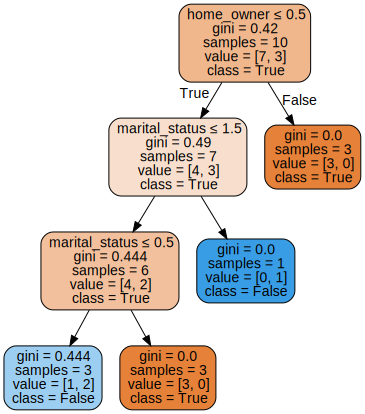

In [57]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df.columns,  
                         class_names=["True", "False"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## O problema dos splits paralelos aos eixos

O que estamos a fazer quando criamos um modelo decisional deste tipo (Descision Tree)?

<img src="images/DecisionTrees.png" style="width:60%"/>

> Ou seja, estamos a criar quadrados com a mesma regra de classificação! 

> E só podemos usar estruturas de divisão paralelas aos eixos. E se o problema fosse assim?

<img src="images/DecisionTrees_2.png" style="width:40%"/>

A fronteira teria que ser dependente de 2 features, neste caso

$$ x+y<1 $$

No entanto a procura de um modelo óptimo é neste caso computacionalmente bem mais difícil.


<img src="images/decisiontree.overfit.png" style="width:60%"/>

### Vantagens/desvatangens das árvores de decisão

#### Vantagens 

- As decisões tomadas pela árvore de decisão são **Simples de entender e de interpretar. As árvores podem ser visualizadas.**
- **Requer pouca preparação de dados.** Outras técnicas muitas vezes exigem a normalização de dados, as variáveis precisam ser recriadas e removidos valores em branco. 
- **O custo do uso da árvore é logarítmico** no número de pontos de dados utilizados para treinar a árvore.
- **É capaz de lidar com dados numéricos e categóricos.** Outras técnicas geralmente são especializadas na análise de conjuntos de dados que possuem apenas um tipo de variável. 
- Capaz de lidar com problemas de várias saídas.
- Usa um modelo de caixa branca. Se uma determinada situação é observável em um modelo, a explicação para a condição é facilmente explicada pela lógica booleana. Em contraste, em um modelo de caixa preta (por exemplo, em uma rede neuronal), os resultados podem ser mais difíceis de interpretar.
- Possível validar um modelo usando testes estatísticos. Isso torna possível explicar a confiabilidade do modelo.

#### Desvantagens

- **Os algoritmos de criação de árvores de decisão podem criar árvores excessivamente complexas que não generalizam bem os dados**. Isso é chamado de **overfitting** (remember?). Existem mecanismos para evitar esse problema, como definir o número mínimo de amostras necessárias em um nó da folha; definir a profundidade máxima da árvore ou usar métodos multiárvore - *Random Forrest* - que veremos mais à frente.
- **As árvores de decisão podem ser instáveis** porque pequenas variações nos dados podem resultar em uma árvore completamente diferente sendo gerada (Problema tipicamente mal-posto - ***ill posed**). Este problema é atenuado usando árvores de decisão em *Random Forrests*.
- O problema de aprender uma árvore de decisão ótima é conhecido por ser NP-completo em vários aspectos de otimização e até mesmo para conceitos simples. Consequentemente, os algoritmos práticos de aprendizagem de árvores de decisão baseiam-se em algoritmos heurísticos como o algoritmo greedy onde as decisões localmente ótimas são feitas em cada nó. **Tais algoritmos não podem garantir a devolução da árvore de decisão globalmente ideal.** Isso pode ser atenuado ao treinar várias árvores, onde as features e os registos são amostradas aleatoriamente com substituição (*Random Forrests*)
- Os algoritmos de criação de árvores de decisão criam árvores "***biased***" se algumas classes dominarem. Portanto, recomenda-se equilibrar o conjunto de dados.

## Decision Trees com o Data Set Iris

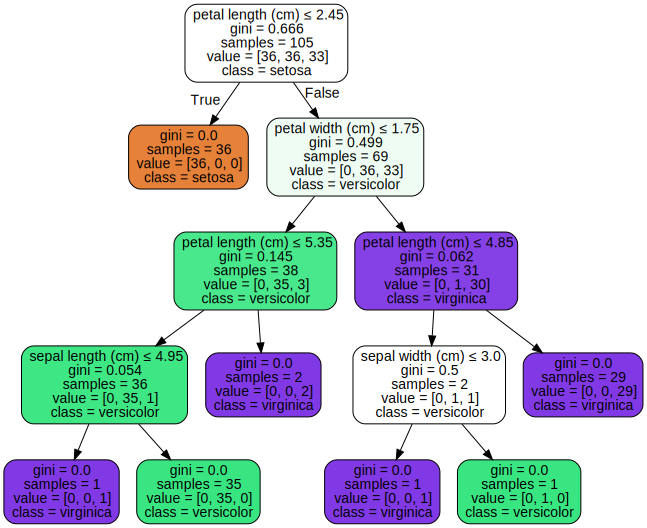

In [88]:
# Start by importing the modules

from sklearn import datasets, tree, model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Iris = datasets.load_iris()

[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(Iris.data, Iris.target, test_size=0.30)
model = tree.DecisionTreeClassifier()

clf = model.fit(features_train, classes_train)

score_train = model.score(features_train, classes_train)
score_test = model.score(features_test, classes_test)

print("Features:", Iris.target_names)
print("score_train:", score_train)
print("score_test:", score_test)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=Iris.feature_names,  
                         class_names=Iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


Vamos ver os mapas de decisão desenhados pelo algoritmo, para as features, 2 a 2 (4 features):

<img src="images/tree.png" style="width:60%"/>



### Real Life Example (from SONAE, and others) 

https://rapidminer.com?wvideo=3817lp17lz


### The Overfitting Problem

As árvores de decisão normalmente possuem alta Variancia: fazem overfit aos seus training set's, isto é, têm baixa bias, mas variância muito alta.

<img src="images/trees_overfitting.png" style="width:60%"/>

Há várias formas de resolver este problema mas a forma mais interessante é a utilização de Random Forrests.

# ---

# Random Forrest Classifier
    
---

## O que é um Ensemble Method


Ensemble Methods são uma abordagem do tipo **Divide and Conquer** usada para melhorar o desempenho de algoritmos. 
O princípio principal por trás dos métodos ensemble é que **um grupo de "modelos fracos" se pode unir para formar um "modelo forte"**. Vejamos este exemplo de regressão: 

<img src="images/random_forest_1.png" style="width:40%"/>


Cada classificador cinzento, individualmente, é um "modelo fraco", enquanto todos os classificadores juntos (encarnado) são um "modelo forte".
    
    
A questão passa por como juntar modelos fracos num único, forte. 

> Vamos ver o nosso exemplo Random Forrest


### Random Forrest é um método "Ensemble" para decision trees

O Random Forrest faz amostrages aleatórias com repetição de registos (**bagging**) do data set de treino e sobre cada uma das amostras gera uma árvore de decisão. 

> **bagging** - apos amostrado o registo volta para o set selecionável

Vejamos algumas imagens para ter intuição sobre o processo:

<img src="images/maxresdefault.jpg" style="width:40%"/>


ainda mais um esquema:

<img src="images/l4-ensembles-of-decision-trees-10-638.jpg" style="width:40%"/>

####  Feature bagging

Existe mais uma diferença para uma Arvore de decisão normal: Em cada árvore do Random Forrest o processo de seleccão das features em cada passo da sua criação é também aleatório.

## O resultado da classificação

Quando temos um novo elemento que queremos classificar, corrermos este elemento em todas as árvores e no final tomamos como a sua classificação a classe com maioria dos votos das diversas árvores.

## Random Forrest com sklearn

---

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

Iris = load_iris()

[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(Iris.data, Iris.target, test_size=0.30)
model = RandomForestClassifier(n_estimators=1000)

clf = model.fit(features_train, classes_train)

score_train = model.score(features_train, classes_train)
score_test = model.score(features_test, classes_test)

print("score_train:", score_train)
print("score_test:", score_test)



score_train: 1.0
score_test: 0.955555555556



Os resultados, comparativamente ao método decision tree são apresentados no seguinte mapa:

<img src="images/random_forest_3.png" style="width:40%"/>


